<div class="alert alert-block alert-info">
    <h1>Mathematics for Robotics and Control - SS24</h1>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you <b>should not change the name, arguments or return value</b> of the function.</p>
    <p>If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.</p>
    <p>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  <code>raise NotImplementedError</code>. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are due on <b>Sunday</b> at <b> 20:00 </b> CEST.</p>
    <h3>Group Work:</h3>
    <p>Group work is allowed! If you are working in a group, please write your student IDs (ending with -2s) in the designated cell below.</p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline.</p>
    
</div>

In [6]:
# Please fill in the usernames of all your team members

member1 = 'aarora2s'
member2 = ''

# Task 1

**[30 Point(s)]**

## Common Discrete Random Variables [30 points]

In this exercise, you will investigate some properties of a few common discrete random variables (please look at the lab class material for an introduction to these).

## Task 1.1

**[5 Point(s)]**

### Dart-throwing Robot

Let's suppose that we have a robot throwing darts at a dartboard. A dartboard is divided into 20 equal regions for points from 1 to 20 (for the sake of this problem, we will ignore the bullseye and the regions for doubles and triples). Our robot is not very proficient at playing the game: we know that each throw will finish on the board (hitting any of the regions is equally likely). The game will end when 20 is hit for the first time.

Calculate the <u>***expected number of throws***</u> for the robot to finally hit a 20.

<!-- subtasks: -->
<!-- - Let $Y$ denote the random variable (RV) of this experiment. What is $Range(Y) = ?$ -->
<!-- - Let $p_Y(i)$ denote the probability mass function of $Y$. Determine $p_Y(i)$ in general and then $p_Y(5)$. -->
<!-- - calculate $E[Y]$! -->



In [1]:
from sympy import ImageSet, S, Lambda
from sympy.abc import i,p,k
import sympy as sy

P_20 = 1/20
## Wichtig : The geometric distribution models the number of trials needed to achieve the first success 
## in a series of independent Bernoulli trials.
# Please assign the expected number of the following variable

expected_throws = 1/P_20 # Formula for the Expected value of geometric distribution 
print("Expected throws for robot hitting a 20 =", expected_throws)

#raise NotImplementedError()

Expected throws for robot hitting a 20 = 20.0


In [8]:
### This cell contains automated tests for your solution


## Task 1.2

**[10 Point(s)]**

### Power system

In the analysis of randomised algorithms, we often talk about *indicator random variables*. For a certain event of interest $A$, an indicator random variable $\mathbb{1}$ is one that takes the values $1$ and $0$ with probabilities $P(A)$ and $1 - P(A)$ respectively; indicator random variables are thus Bernoulli random variables. Indicator random variables can often simplify the calculation of what could otherwise can be a relatively complicated problem.

Observe:
$$
\mathbb{1}_A(\omega)=\left\{\begin{array}{lll}
1, & \text { falls } & \omega \in A, \\
0, & \text { falls } & \omega \notin A .
\end{array}\right.
$$
and as a consequence: 
$$
\begin{eqnarray}
\mathbb{1}_{A^c}&=&1-\mathbb{1}_A \\
\mathbb{1}_{A \cap B}&=&\mathbb{1}_A \mathbb{1}_B \\
\mathbb{1}_A^2&=&\mathbb{1}_A \\
A \subset B &\Longleftrightarrow& \mathbb{1}_A \leq 1_B \\
A \cap B=\emptyset &\Rightarrow& \mathbb{1}_{A \cup B}=\mathbb{1}_A+\mathbb{1}_B \\
E[\mathbb{1}_A]&=&P(A)
\end{eqnarray}
$$

Let's suppose that we running a doubly redundant web cluster (see below). 
<img src="./Assignment_03_Random_Variables_files/img/HeizungsFaults.png"/>

The two Server nodes (4) and (5) are either getting regular power supply (from (1) or (2)) or emergency power from the UPS (3). The event $OUT$ happens when ***on at least one pathway*** $W_1, ..., W_5$ we are connected from to $IN$ to $OUT$. A pathway $W_i$ is working if all its nodes are connected. A node connect event is called $B_i$ and happens with probability $q_i = 1 - p_i = P(B_i)$ (i.e $p_i$ denotes the probability of disconnection).

First give a general equation for $P(OUT)$ using indicator functions for nodes and pathways.  

**Hint**: use DeMorgan, and reason through steps if possible!

## Answer
#### General Obseration 
$$ P(OUT) = \{ W_{1} \cup W_{2} \cup W_{3} \cup W_{4} \cup W_{5} \}  $$

but, we are given: A node connect event is called $B_i$ and happens with probability $q_i = 1 - p_i = P(B_i)$ 

$$P(OUT) = 1 - P(B_i)$$ ,(A node is connected)

$$P(OUT) = 1 - (1 - p_i)$$ , here $p_i $ is $ \prod_{j \in W_i} q_j $ and for i = 5 considering any one of them is failed 


$$
P(OUT) = 1 - \prod_{i=1}^{5} \left( 1 - \prod_{j \in W_i} q_j \right)
$$


## Task 1.3

**[5 Point(s)]**

Then calculate $P(OUT)$ using $p_i = 0.8, \  \forall i$

In [3]:
# Given probability of disconnection for each connection
p_i = 0.8  # Probability of disconnection
q_i = 1 - p_i  # Probability of connection working

# Each of the 5 independent connections
P_W1 = q_i  # Connection between 1 and 4
P_W2 = q_i  # Connection between 3 and 4
P_W3 = q_i  # Connection between 3 and 5
P_W4 = q_i  # Connection between 3 and 4 (again)
P_W5 = q_i  # Connection between 2 and 5

# Compute probability of failure for each connection
P_W1_fail = 1 - P_W1
P_W2_fail = 1 - P_W2
P_W3_fail = 1 - P_W3
P_W4_fail = 1 - P_W4
P_W5_fail = 1 - P_W5

# Compute probability that all connections fail
P_all_fail = P_W1_fail * P_W2_fail * P_W3_fail * P_W4_fail * P_W5_fail

# Compute probability that at least one connection works (P(OUT))
P_OUT = 1 - P_all_fail

# Display the result
P_OUT


0.6723199999999998

In [ ]:
### This cell contains automated tests for your solution


## Task 1.4

**[5 Point(s)]**

### Bernoulli Random Variables

Find the mean and variance of a Bernoulli random variable which is a random variable with two states $0$ and $1$ given via the probability function
$$
p(0) = 1-p$$

$$p(1) = p
$$.

Mean = $E[X]$ = p(0) * 0 + p(1) * 1 = 0 + p = p 

$ E[X^2] $ = $E[X]$ = p

$(E[X])^2 $ =  $p^2$

Variance = $ E[X^2] - (E[X])^2 $ = $ p - p^2 $ = $p(1-p)$

## Task 1.5

**[5 Point(s)]**

### Geometric Random Variables

Find the mean of a geometric random variable which is a random variable from $\{0, 1, ...\}$ with a parameter $p$ that defines its probability function
$$
p(k) = (1 - p)^{k-1} p
$$

Additional information: Geometric random variables describe the number of trials one needs before the first success.  
Hint: when building the expected value $E[B]$ you might want to consider: $\tfrac{d}{dp} (1-p)^k = - k(1-p)^{k-1}$

### Answer

Please write your answer here!

$ E[B] = p \sum_{k=1}^{\infty} k.{(1-p)}^{k-1} $

Using the identity for the sum of a series for |x| < 1:

$ \sum_{k=1}^{\infty} k.{x}^{k-1} = \frac{1}{(1-x)^2} $

Substituting x = 1-p,

$ \sum_{k=1}^{\infty} k.{(1- p)}^{k-1} = \frac{1}{p^2} $

Substituting in $E[B]$ we  get,

$E[B] = p.\frac{1}{p^2} = \frac{1}{p}$


# Task 2

**[25 Point(s)]**

##  Football European Championship

You are following the ongoing football European championship and you want to make some predictions about your favourite team in the group stage. In the group stage, each team plays against three opponents, such that, as usual, $3$ points are obtained for a victory, $1$ points for a draw, and $0$ points for a loss. Your team is in a particularly strong group, such that it can win each match with a $65\%$ probability and play a draw with a $20\%$ probability, regardless of the outcomes in the other matches.

## Task 2.1

**[10 Point(s)]**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom, factorial, gamma

### Calculate probability distribution

Find the probability distribution of obtained points in the group.

In [18]:
from itertools import product

P_win = 0.65  # Probability of winning a match
P_draw = 0.20  # Probability of drawing a match
P_loss = 1 - (P_win + P_draw)  # Probability of losing a match

# Points for each outcome
points = {'W': 3, 'D': 1, 'L': 0}

# Generate all possible outcomes for 3 matches
outcomes = list(product(['W', 'D', 'L'], repeat=3))

print(outcomes)
distribution={}
for result in outcomes:
    
    total_points = sum(points[r] for r in result)
    prob = (P_win ** result.count('W')) * (P_draw ** result.count('D')) * (P_loss ** result.count('L'))
    distribution[total_points] = distribution.get(total_points, 0) + prob
    
    
#probability distribution
print("Probability distribution of total points: ", point_dist)
    
#raise NotImplementedError()

[('W', 'W', 'W'), ('W', 'W', 'D'), ('W', 'W', 'L'), ('W', 'D', 'W'), ('W', 'D', 'D'), ('W', 'D', 'L'), ('W', 'L', 'W'), ('W', 'L', 'D'), ('W', 'L', 'L'), ('D', 'W', 'W'), ('D', 'W', 'D'), ('D', 'W', 'L'), ('D', 'D', 'W'), ('D', 'D', 'D'), ('D', 'D', 'L'), ('D', 'L', 'W'), ('D', 'L', 'D'), ('D', 'L', 'L'), ('L', 'W', 'W'), ('L', 'W', 'D'), ('L', 'W', 'L'), ('L', 'D', 'W'), ('L', 'D', 'D'), ('L', 'D', 'L'), ('L', 'L', 'W'), ('L', 'L', 'D'), ('L', 'L', 'L')]
Probability distribution of total points:  [0.003375 0.0135   0.018    0.051875 0.117    0.078    0.190125 0.2535
 0.       0.274625]


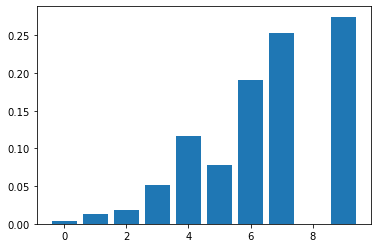

In [13]:
# Plotting the distribution as a bar plot
plt.bar(np.arange(0, 10), point_dist)
plt.show()

In [ ]:
### This cell contains automated tests for your solution


## Task 2.2

**[5 Point(s)]**

### Find expected points $E[Points]$ 

What is the expected number of points that your team will obtain?

In [22]:
# Assign your result to the following variable
expected_number_of_points = 0
print(point_dist)
# YOUR CODE HERE
for point, probablities in enumerate(point_dist):
    print(point, probablities)
    expected_number_of_points += point * probablities  # Accumulate the weighted sum

print('Expected number of points = {0}'.format(expected_number_of_points))

#raise NotImplementedError()

[0.003375 0.0135   0.018    0.051875 0.117    0.078    0.190125 0.2535
 0.       0.274625]
0 0.003375
1 0.013499999999999998
2 0.018000000000000002
3 0.051875
4 0.11700000000000002
5 0.07800000000000001
6 0.190125
7 0.25350000000000006
8 0.0
9 0.27462500000000006
Expected number of points = 6.450000000000001


In [ ]:
### This cell contains automated tests for your solution


## Task 2.3

**[5 Point(s)]**

### Cumulative Distribution Function

What is the CDF of the points obtained by your team?

You may not use any built-in library functions for calculating your answer!

In [16]:
# Assign your result to the following variable
point_cdf = np.zeros(10)

# YOUR CODE HERE
c_prob = 0.0  #initializing cumulative probability
for i in range(len(point_dist)):
    c_prob += point_dist[i]  # Add the probability for the current point
    point_cdf[i] = c_prob  # store the cumulative probability in the CDF array

# CDF
print('CDF of points obtained by the team:', point_cdf)

#raise NotImplementedError()

CDF of points obtained by the team: [0.003375 0.016875 0.034875 0.08675  0.20375  0.28175  0.471875 0.725375
 0.725375 1.      ]


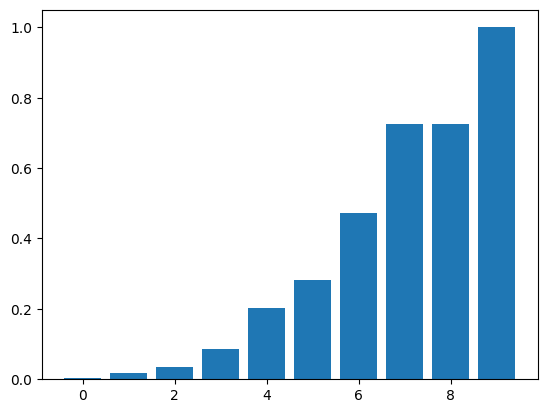

In [17]:
# Plotting the distribution as a bar plot
plt.bar(np.arange(0, len(point_dist)), point_cdf)
plt.show()

In [ ]:
### This cell contains automated tests for your solution


## Task 2.4

**[5 Point(s)]**

### Compute the probability

What is the probability that your team will obtain more than $6$ points in the group?

In [17]:
# Assign your result to the following variable
p_more_than_six_points = 0

# YOUR CODE HERE
prob_sum = 0

for points in range(7, 10):  
    prob_sum += point_dist[points]
    
p_more_than_six_points = prob_sum

#raise NotImplementedError()

print('Probability of more than six points = {0}'.format(p_more_than_six_points))

Probability of more than six points = 0.5281250000000002


In [ ]:
### This cell contains automated tests for your solution


# Task 3

**[25 Point(s)]**

## RoboCup football [20 points] 

Let's suppose that we have a RoboCup football field of size $x \times y = 10m \times 20m$. Assume that two robots $r_1$ and $r_2$ are located in the field at points $(x_1, y_1)$ and $(x_2, y_2)$ and that $x_1$ and $x_2$ are uniformly distributed between $[0,10]$, and similarly, $y_1$ and $y_2$ are uniformly distributed between $[0,20]$. The setup is as shown in the figure below.

![RoboCup Football field](Assignment_03_Random_Variables_files/img/football_field.png)


## Task 3.1

**[20 Point(s)]**

In [19]:
from typing import Sequence, Dict

import numpy as np
import matplotlib.pyplot as plt

### Expected distance between robots

Calculate the approximate expected distance between $r_1$ and $r_2$.

Use 20 bins and N = 100000 trials.

*Hint 1*: Write code that could help you find a solution.

*Hint 2*: Uniformly sample the random variables in their respective bounds.

In [20]:
N = 100000 # number of runs
bins = 20 # number of bins in histogram

# Assign your result to the following variable
expected_distance = ...

# YOUR CODE HERE
#generate random samples for r1 and r2

x1 = np.random.uniform(0, 10, N)
y1 = np.random.uniform(0, 20, N)
x2 = np.random.uniform(0, 10, N)
y2 = np.random.uniform(0, 20, N)

#now calculate the distances between the two robots
dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

#the expected distance will be the mean distance between the two robots
expected_distance = np.mean(dist)
#raise NotImplementedError()

print('Expected distance between the robots: {0}'.format(expected_distance))

Expected distance between the robots: 8.038057746589446


In [ ]:
### This cell contains tests for your solution


## Task 3.2

**[5 Point(s)]**

### Plot the distribution

Plot a histogram of the distribution of the obtained random distances and explain the growth behaviour.

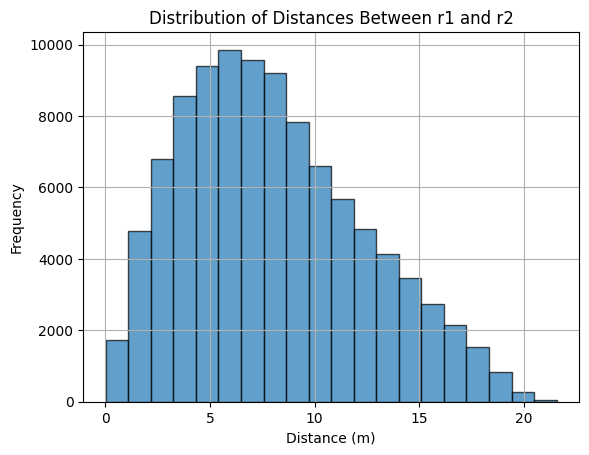

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE
plt.hist(dist, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Distances Between r1 and r2')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#raise NotImplementedError()

In [ ]:
### This cell contains tests for your solution


# Task 4

**[20 Point(s)]**

## Random Variables [20 points]

In this exercise, you'll create a very simple Python library for discrete random variables. In particular, given a random variable $X$ whose probability mass function $P(X)$ is known, your library will be able to:

* Calculate the expected value of $X$
* Calculate the variance of $X$
* Calculate the expected value of a function of $X$
* Calculate the **conditional expectation** of $X$ given an event $Y = y$: Given an event $Y = y$, the PMF of $X$ changes to the conditional PMF $P_{X|Y=y}(x|y)$; the conditional expectation is thus defined as
    \begin{equation*}
        E[X|Y=y] = \sum_{x}{xP_{X|Y=y}(x|y)}
    \end{equation*}
* Create the **cumulative distribution function (CDF)** of $X$: The cumulative distribution function $F(X)$ returns the probability that $X$ is less than or equal to a given value $x$, i.e.
    \begin{equation*}
        F(X) = P(X \leq x)
    \end{equation*}
* Generate samples from the PMF: Sampling from the PMF is best explained by an example. Let's say that we have a discrete random variable $X$ that takes the values $1$, $2$, and $3$, whose probabilities are $P(X=1) = 0.2$, $P(X=2) = 0.5$, and $P(X=3) = 0.3$. If we generate a lot of samples from this distribution (say a thousand), we would expect that roughly $200$ of those are equal to $1$, $500$ are equal to $2$, and $300$ are equal to $3$. *Hint*: You may **not** use existing library functions (e.g. in numpy) when implementing the sampling function.



## Task 4.1

**[2 Point(s)]**

Define your library functions in the class *DiscreteRandomVariable*, whose interface is given below. Verify that your functions are working correctly by running the test cases below and making sure that none of the assertions fail.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import typing

class DiscreteRandomVariable(object):
    def __init__(self, values: np.ndarray, pmf: np.ndarray):
        '''Keyword arguments:
        values: np.ndarray -- allowed values for the random variable
        pmf: np.ndarray -- probabiility mass function of the random variable

        '''
        self.values = np.array(values)
        self.pmf = np.array(pmf)

    def expectation(self) -> float:
        '''Calculates the expected value of the random variable.
        '''
        # YOUR CODE HERE
        e_x = np.sum(self.values * self.pmf)
        
        #raise NotImplementedError()

        return e_x

    def variance(self) -> float:
        '''Calculates the variance of the random variable.
        '''
        # YOUR CODE HERE
        mean = self.expectation()
        var_x = np.sum(((self.values - mean) ** 2) * self.pmf)
        
        #raise NotImplementedError()

        return var_x

    def function_expectation(self, g: typing.Callable) -> float:
        '''Calculates the expectation of a function of the random variable.

        Keyword arguments:
        g: typing.Callable -- function for transforming the values
                              of the random variable

        '''
        # YOUR CODE HERE
        transformed_values = g(self.values)
        e_g_x = np.sum(transformed_values * self.pmf)
        
        #raise NotImplementedError()

        return e_g_x

    def conditional_expectation(self, y_values: np.ndarray,
                                conditional_pmfs: np.ndarray,
                                observed_y: int) -> float:
        '''Calculates the conditional expectation of the random variable
        given a particular value of another random variable.

        Keyword arguments:
        y_values: np.array -- a list of possible y values
        conditional_pmfs: np.ndarray -- a 2D array with as many rows as
                                        there are values in y_values,
                                        such that each row represents
                                        the conditional pmf of x given y
        observed_y: the observed value of y

        '''
        # YOUR CODE HERE
        # Find the index of the observed y in y_values
        y_index = np.where(y_values == observed_y)[0][0]
        conditional_pmf = conditional_pmfs[y_index]
        
        # Calculate the conditional expectation
        conditional_e_x = np.sum(self.values * conditional_pmf)
        
        #raise NotImplementedError()

        return conditional_e_x

    def cdf(self) -> np.ndarray:
        '''Returns a numpy array representing the cumulative
        distribution function of the random variable.
        '''
        cdf = np.zeros(len(self.pmf) + 1)

        # YOUR CODE HERE
        cdf[1:] = np.cumsum(self.pmf)
        
        #raise NotImplementedError()

        return cdf

    def sample(self, number_of_samples: int) -> np.ndarray:
        '''Samples values from the random variable.
        Returns a numpy array with the generated samples.

        Keyword arguments:
        number_of_samples: int -- number of samples to generate

        '''
        samples = list()

        # YOUR CODE HERE
        cumulative_pmf = np.cumsum(self.pmf)
        for _ in range(number_of_samples):
            random_val = np.random.rand()
            for i, cum_prob in enumerate(cumulative_pmf):
                if random_val <= cum_prob:
                    samples.append(self.values[i])
                    break
        
        #raise NotImplementedError()

        return np.array(samples)

X = DiscreteRandomVariable(np.array([-2, -1, 0, 1, 2]),
                           np.array([0.4, 0.1, 0.2, 0.2, 0.1]))

# expected value test case
e_x = X.expectation()
print(f'e_x: {e_x}')
assert abs(e_x-(-0.5)) < 1e-5

# variance test case
var_x = X.variance()
print(f'var_x: {var_x}')
assert abs(var_x-2.05) < 1e-5

# expected value of a function test case
g = lambda x: x**2
e_g_x = X.function_expectation(g)
print(f'e_g_x: {e_g_x}')
assert abs(e_g_x-2.3) < 1e-5

# conditional expectation test case
y_values = np.array([-2, 1, 4])
conditional_pmfs = np.array([[0.3, 0., 0.3, 0.1, 0.3], \
                             [0.2, 0.1, 0., 0.6, 0.1], [0., 0.3, 0.5, 0.2, 0.]])
observed_y = 4
conditional_e_x = X.conditional_expectation(y_values, conditional_pmfs, observed_y)
print(f'conditional_e_x: {conditional_e_x}')
assert abs(conditional_e_x-(-0.1)) < 1e-5

# CDF test case
cdf = X.cdf()
assert np.all(np.abs(cdf - np.array([0., 0.4, 0.5, 0.7, 0.9, 1.])) < 1e-5)

# sampling test case
samples = np.array(X.sample(10000))
counts = np.zeros(5)
counts[0] = len(np.where(samples==-2)[0])
counts[1] = len(np.where(samples==-1)[0])
counts[2] = len(np.where(samples==0)[0])
counts[3] = len(np.where(samples==1)[0])
counts[4] = len(np.where(samples==2)[0])
assert counts[0] > 3750 and counts[0] < 4250
assert counts[1] > 750 and counts[1] < 1250
assert counts[2] > 1750 and counts[2] < 2250
assert counts[3] > 1750 and counts[3] < 2250
assert counts[4] > 750 and counts[4] < 1250

e_x: -0.49999999999999994
var_x: 2.05
e_g_x: 2.3000000000000003
conditional_e_x: -0.09999999999999998


In [3]:
### This cell contains automated tests for your solution


In [4]:
### This cell contains automated tests for your solution


In [5]:
### This cell contains automated tests for your solution


In [6]:
### This cell contains automated tests for your solution


In [7]:
### This cell contains automated tests for your solution


In [8]:
### This cell contains automated tests for your solution
